# Necessary Comment : jupyter notebook

## Necessary Lighbary



In [251]:
import sqlite3
import pandas as pd
import talib
import mplfinance as mpf
import numpy as np

## Database Connection

In [252]:
connection = sqlite3.connect(r"cripto.db")
# connection = sqlite3.connect(r"big_data.db")
cur = connection.cursor()
database_data = cur.execute("select * from asset order by CloseTime").fetchall()

## Dataframe

In [253]:
df = pd.DataFrame(database_data)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1322,BTCBUSD,16765.75,16770.81,16764.48,16765.73,40.99442,-0.000119290816100899,1.671515e+12,6.873578e+05,1880.0,19.68150,1671514860
1,245,BTCBUSD,16754.13,16755.60,16753.41,16754.11,12.70363,-0.000119373551479167,1.671450e+12,2.128430e+05,420.0,7.32206,1671450240
2,1411,BTCBUSD,16820.70,16825.45,16813.12,16820.67,86.91679,-0.000178351673845166,1.671520e+12,1.461859e+06,2180.0,40.39891,1671520200
3,1347,BTCBUSD,16781.05,16784.23,16779.70,16781.01,58.39194,-0.000238364107137951,1.671516e+12,9.799370e+05,1768.0,32.39458,1671516360
4,336,BTCBUSD,16746.45,16747.51,16741.80,16746.40,107.27098,-0.000298570741854378,1.671456e+12,1.796215e+06,2613.0,55.70302,1671455700
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,1144,BTCBUSD,16702.23,16861.42,16700.80,16767.82,2038.68257,0.392702052360674,1.671504e+12,3.423084e+07,23046.0,1082.16825,1671504180
1436,1143,BTCBUSD,16637.46,16710.00,16637.46,16702.97,734.60299,0.393750007513178,1.671504e+12,1.225125e+07,9072.0,369.70206,1671504120
1437,209,BTCBUSD,16754.23,16757.03,16750.89,16754.24,39.97731,5.96864195014469e-05,1.671448e+12,6.697752e+05,1249.0,23.29745,1671448080
1438,588,BTCBUSD,16618.14,16621.19,16612.77,16618.15,84.67192,6.01752061424279e-05,1.671471e+12,1.406916e+06,1806.0,34.32521,1671470820


## Name Columns

In [254]:
df.columns = ['Id', 'Symbol', 'Open', 'High', 'Low', 'Close', 'VolumeBTC', 'Change', 'CloseTime','VolumeBUSD', 'Trades', 'BuyQuoteVolume', 'Time']
# df = df.iloc[:, 2:12]
df


,Id,Symbol,Open,High,Low,Close,VolumeBTC,Change,CloseTime,VolumeBUSD,Trades,BuyQuoteVolume,Time
0,1322,BTCBUSD,16765.75,16770.81,16764.48,16765.73,40.99442,-0.000119290816100899,1.671515e+12,6.873578e+05,1880.0,19.68150,1671514860
1,245,BTCBUSD,16754.13,16755.60,16753.41,16754.11,12.70363,-0.000119373551479167,1.671450e+12,2.128430e+05,420.0,7.32206,1671450240
2,1411,BTCBUSD,16820.70,16825.45,16813.12,16820.67,86.91679,-0.000178351673845166,1.671520e+12,1.461859e+06,2180.0,40.39891,1671520200
3,1347,BTCBUSD,16781.05,16784.23,16779.70,16781.01,58.39194,-0.000238364107137951,1.671516e+12,9.799370e+05,1768.0,32.39458,1671516360
4,336,BTCBUSD,16746.45,16747.51,16741.80,16746.40,107.27098,-0.000298570741854378,1.671456e+12,1.796215e+06,2613.0,55.70302,1671455700
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,1144,BTCBUSD,16702.23,16861.42,16700.80,16767.82,2038.68257,0.392702052360674,1.671504e+12,3.423084e+07,23046.0,1082.16825,1671504180
1436,1143,BTCBUSD,16637.46,16710.00,16637.46,16702.97,734.60299,0.393750007513178,1.671504e+12,1.225125e+07,9072.0,369.70206,1671504120
1437,209,BTCBUSD,16754.23,16757.03,16750.89,16754.24,39.97731,5.96864195014469e-05,1.671448e+12,6.697752e+05,1249.0,23.29745,1671448080
1438,588,BTCBUSD,16618.14,16621.19,16612.77,16618.15,84.67192,6.01752061424279e-05,1.671471e+12,1.406916e+06,1806.0,34.32521,1671470820


# Make a Candle plot

In [255]:
# """
# Candle Data Column
# """
# df_candle = df[['CloseTime', 'Open', 'High', 'Low', 'Close', 'VolumeBTC']]

# """
# Time Indexing
# """
# df_candle = df.set_index('CloseTime')
# df_candle.index = pd.to_datetime(df.index, unit='ms')

# mpf.plot(
#     df_candle.tail(100),
# #     df,
#     mav=[7, 25 , 90],
#     type="candle",
# #     type="renko",
#     title=f"BTC BUSD Price Candle",
#     style="yahoo",
# )

In [256]:
df = df.set_index('CloseTime')
df.index = pd.to_datetime(df.index, unit='ms')
# df = df.tail(100)
df

,Id,Symbol,Open,High,Low,Close,VolumeBTC,Change,VolumeBUSD,Trades,BuyQuoteVolume,Time
CloseTime,,,,,,,,,,,,
2022-12-20 05:41:59.999000064,1322,BTCBUSD,16765.75,16770.81,16764.48,16765.73,40.99442,-0.000119290816100899,6.873578e+05,1880.0,19.68150,1671514860
2022-12-19 11:44:59.999000064,245,BTCBUSD,16754.13,16755.60,16753.41,16754.11,12.70363,-0.000119373551479167,2.128430e+05,420.0,7.32206,1671450240
2022-12-20 07:10:59.999000064,1411,BTCBUSD,16820.70,16825.45,16813.12,16820.67,86.91679,-0.000178351673845166,1.461859e+06,2180.0,40.39891,1671520200
2022-12-20 06:06:59.999000064,1347,BTCBUSD,16781.05,16784.23,16779.70,16781.01,58.39194,-0.000238364107137951,9.799370e+05,1768.0,32.39458,1671516360
2022-12-19 13:15:59.999000064,336,BTCBUSD,16746.45,16747.51,16741.80,16746.40,107.27098,-0.000298570741854378,1.796215e+06,2613.0,55.70302,1671455700
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-20 02:43:59.999000064,1144,BTCBUSD,16702.23,16861.42,16700.80,16767.82,2038.68257,0.392702052360674,3.423084e+07,23046.0,1082.16825,1671504180
2022-12-20 02:42:59.999000064,1143,BTCBUSD,16637.46,16710.00,16637.46,16702.97,734.60299,0.393750007513178,1.225125e+07,9072.0,369.70206,1671504120
2022-12-19 11:08:59.999000064,209,BTCBUSD,16754.23,16757.03,16750.89,16754.24,39.97731,5.96864195014469e-05,6.697752e+05,1249.0,23.29745,1671448080


In [257]:
# from dataframe import GetDataframe
# df = GetDataframe().data_function('BTCBUSD', 1, 10000)
# df

# Super Trend

https://medium.com/codex/step-by-step-implementation-of-the-supertrend-indicator-in-python-656aa678c111

In [258]:
# df = df.iloc[:, 2:7]
# df.rename(columns={'VolumeBTC': 'volume'}, inplace=True)
# df.index = df.index.rename('datetime')
# df = df.applymap(lambda s:s.lower() if isinstance(s, str) else s)
# tsla = df
# tsla['High']

In [259]:
# def get_supertrend(high, low, close, lookback, multiplier):
#
#     # ATR
#
#     tr1 = pd.DataFrame(high - low)
#     tr2 = pd.DataFrame(abs(high - close.shift(1)))
#     tr3 = pd.DataFrame(abs(low - close.shift(1)))
#     frames = [tr1, tr2, tr3]
#     tr = pd.concat(frames, axis = 1, join = 'inner').max(axis = 1)
#     atr = tr.ewm(lookback).mean()
#
#     # H/L AVG AND BASIC UPPER & LOWER BAND
#
#     hl_avg = (high + low) / 2
#     upper_band = (hl_avg + multiplier * atr).dropna()
#     lower_band = (hl_avg - multiplier * atr).dropna()
#
#     # FINAL UPPER BAND
#     final_bands = pd.DataFrame(columns = ['upper', 'lower'])
#     final_bands.iloc[:,0] = [x for x in upper_band - upper_band]
#     final_bands.iloc[:,1] = final_bands.iloc[:,0]
#     for i in range(len(final_bands)):
#         if i == 0:
#             final_bands.iloc[i,0] = 0
#         else:
#             if (upper_band[i] < final_bands.iloc[i-1,0]) | (close[i-1] > final_bands.iloc[i-1,0]):
#                 final_bands.iloc[i,0] = upper_band[i]
#             else:
#                 final_bands.iloc[i,0] = final_bands.iloc[i-1,0]
#
#     # FINAL LOWER BAND
#
#     for i in range(len(final_bands)):
#         if i == 0:
#             final_bands.iloc[i, 1] = 0
#         else:
#             if (lower_band[i] > final_bands.iloc[i-1,1]) | (close[i-1] < final_bands.iloc[i-1,1]):
#                 final_bands.iloc[i,1] = lower_band[i]
#             else:
#                 final_bands.iloc[i,1] = final_bands.iloc[i-1,1]
#
#     # SUPERTREND
#
#     supertrend = pd.DataFrame(columns = [f'supertrend_{lookback}'])
#     supertrend.iloc[:,0] = [x for x in final_bands['upper'] - final_bands['upper']]
#
#     for i in range(len(supertrend)):
#         if i == 0:
#             supertrend.iloc[i, 0] = 0
#         elif supertrend.iloc[i-1, 0] == final_bands.iloc[i-1, 0] and close[i] < final_bands.iloc[i, 0]:
#             supertrend.iloc[i, 0] = final_bands.iloc[i, 0]
#         elif supertrend.iloc[i-1, 0] == final_bands.iloc[i-1, 0] and close[i] > final_bands.iloc[i, 0]:
#             supertrend.iloc[i, 0] = final_bands.iloc[i, 1]
#         elif supertrend.iloc[i-1, 0] == final_bands.iloc[i-1, 1] and close[i] > final_bands.iloc[i, 1]:
#             supertrend.iloc[i, 0] = final_bands.iloc[i, 1]
#         elif supertrend.iloc[i-1, 0] == final_bands.iloc[i-1, 1] and close[i] < final_bands.iloc[i, 1]:
#             supertrend.iloc[i, 0] = final_bands.iloc[i, 0]
#
#     supertrend = supertrend.set_index(upper_band.index)
#     supertrend = supertrend.dropna()[1:]
#
#     # ST UPTREND/DOWNTREND
#
#     upt = []
#     dt = []
#     close = close.iloc[len(close) - len(supertrend):]
#
#     for i in range(len(supertrend)):
#         if close[i] > supertrend.iloc[i, 0]:
#             upt.append(supertrend.iloc[i, 0])
#             dt.append(np.nan)
#         elif close[i] < supertrend.iloc[i, 0]:
#             upt.append(np.nan)
#             dt.append(supertrend.iloc[i, 0])
#         else:
#             upt.append(np.nan)
#             dt.append(np.nan)
#
#     st, upt, dt = pd.Series(supertrend.iloc[:, 0]), pd.Series(upt), pd.Series(dt)
#     upt.index, dt.index = supertrend.index, supertrend.index
#
#     return st, upt, dt
#
# df['st'] = get_supertrend(df['High'], df['Low'], df['Close'], 1000, 3)

In [260]:
# # SUPERTREND CALCULATION
# def get_supertrend(high, low, close, lookback, multiplier):

#     # ATR

#     tr1 = pd.DataFrame(high - low)
#     tr2 = pd.DataFrame(abs(high - close.shift(1)))
#     tr3 = pd.DataFrame(abs(low - close.shift(1)))
#     frames = [tr1, tr2, tr3]
#     tr = pd.concat(frames, axis = 1, join = 'inner').max(axis = 1)
#     atr = tr.ewm(lookback).mean()

#     # H/L AVG AND BASIC UPPER & LOWER BAND

#     hl_avg = (high + low) / 2
#     upper_band = (hl_avg + multiplier * atr).dropna()
#     lower_band = (hl_avg - multiplier * atr).dropna()

#     # FINAL UPPER BAND

#     final_bands = pd.DataFrame(columns = ['upper', 'lower'])
#     final_bands.iloc[:,0] = [x for x in upper_band - upper_band]
#     final_bands.iloc[:,1] = final_bands.iloc[:,0]

#     for i in range(len(final_bands)):
#         if i == 0:
#             final_bands.iloc[i,0] = 0
#         else:
#             if (upper_band[i] < final_bands.iloc[i-1,0]) | (close[i-1] > final_bands.iloc[i-1,0]):
#                 final_bands.iloc[i,0] = upper_band[i]
#             else:
#                 final_bands.iloc[i,0] = final_bands.iloc[i-1,0]

#     # FINAL LOWER BAND

#     for i in range(len(final_bands)):
#         if i == 0:
#             final_bands.iloc[i, 1] = 0
#         else:
#             if (lower_band[i] > final_bands.iloc[i-1,1]) | (close[i-1] < final_bands.iloc[i-1,1]):
#                 final_bands.iloc[i,1] = lower_band[i]
#             else:
#                 final_bands.iloc[i,1] = final_bands.iloc[i-1,1]

#     # SUPERTREND

#     supertrend = pd.DataFrame(columns = [f'supertrend_{lookback}'])
#     supertrend.iloc[:,0] = [x for x in final_bands['upper'] - final_bands['upper']]

#     for i in range(len(supertrend)):
#         if i == 0:
#             supertrend.iloc[i, 0] = 0
#         elif supertrend.iloc[i-1, 0] == final_bands.iloc[i-1, 0] and close[i] < final_bands.iloc[i, 0]:
#             supertrend.iloc[i, 0] = final_bands.iloc[i, 0]
#         elif supertrend.iloc[i-1, 0] == final_bands.iloc[i-1, 0] and close[i] > final_bands.iloc[i, 0]:
#             supertrend.iloc[i, 0] = final_bands.iloc[i, 1]
#         elif supertrend.iloc[i-1, 0] == final_bands.iloc[i-1, 1] and close[i] > final_bands.iloc[i, 1]:
#             supertrend.iloc[i, 0] = final_bands.iloc[i, 1]
#         elif supertrend.iloc[i-1, 0] == final_bands.iloc[i-1, 1] and close[i] < final_bands.iloc[i, 1]:
#             supertrend.iloc[i, 0] = final_bands.iloc[i, 0]

#     supertrend = supertrend.set_index(upper_band.index)
#     supertrend = supertrend.dropna()[1:]

#     # ST UPTREND/DOWNTREND

#     upt = []
#     dt = []
#     close = close.iloc[len(close) - len(supertrend):]

#     for i in range(len(supertrend)):
#         if close[i] > supertrend.iloc[i, 0]:
#             upt.append(supertrend.iloc[i, 0])
#             dt.append(np.nan)
#         elif close[i] < supertrend.iloc[i, 0]:
#             upt.append(np.nan)
#             dt.append(supertrend.iloc[i, 0])
#         else:
#             upt.append(np.nan)
#             dt.append(np.nan)

#     st, upt, dt = pd.Series(supertrend.iloc[:, 0]), pd.Series(upt), pd.Series(dt)
#     upt.index, dt.index = supertrend.index, supertrend.index

#     return st, upt, dt

# tsla['st'], tsla['s_upt'], tsla['st_dt'] = get_supertrend(tsla['High'], tsla['Low'], tsla['Close'], 10, 3)
# tsla = tsla[1:]
# print(tsla.head())

# # SUPERTREND STRATEGY

# def implement_st_strategy(prices, st):
#     buy_price = []
#     sell_price = []
#     st_signal = []
#     signal = 0

#     for i in range(len(st)):
#         if st[i-1] > prices[i-1] and st[i] < prices[i]:
#             if signal != 1:
#                 buy_price.append(prices[i])
#                 sell_price.append(np.nan)
#                 signal = 1
#                 st_signal.append(signal)
#             else:
#                 buy_price.append(np.nan)
#                 sell_price.append(np.nan)
#                 st_signal.append(0)
#         elif st[i-1] < prices[i-1] and st[i] > prices[i]:
#             if signal != -1:
#                 buy_price.append(np.nan)
#                 sell_price.append(prices[i])
#                 signal = -1
#                 st_signal.append(signal)
#             else:
#                 buy_price.append(np.nan)
#                 sell_price.append(np.nan)
#                 st_signal.append(0)
#         else:
#             buy_price.append(np.nan)
#             sell_price.append(np.nan)
#             st_signal.append(0)

#     return buy_price, sell_price, st_signal

# buy_price, sell_price, st_signal = implement_st_strategy(tsla['Close'], tsla['st'])

# # GENERATING STOCK POSITION
# position = []
# for i in range(len(st_signal)):
#     if st_signal[i] > 1:
#         position.append(0)
#     else:
#         position.append(1)

# for i in range(len(tsla['Close'])):
#     if st_signal[i] == 1:
#         position[i] = 1
#     elif st_signal[i] == -1:
#         position[i] = 0
#     else:
#         position[i] = position[i-1]

# close_price = tsla['Close']
# st = tsla['st']
# st_signal = pd.DataFrame(st_signal).rename(columns = {0:'st_signal'}).set_index(tsla.index)
# position = pd.DataFrame(position).rename(columns = {0:'st_position'}).set_index(tsla.index)

# frames = [close_price, st, st_signal, position]
# strategy = pd.concat(frames, join = 'inner', axis = 1)

# strategy.head()
# print(strategy[20:25])

# Make a Custom Pattern

In [261]:
# # TODO: ALL all 100 and -100 to the X asis
# # Find Candle Pattern
ENGULFING = talib.CDLENGULFING(df['Open'], df['High'], df['Low'],
                                         df['Close'])
ENGULFING
ENGULFING[ENGULFING != 0]

# bullish_engulfing = (ENGULFING.replace([-100, 0], np.nan)/100) *(df.Low-2)
# bearsh_engulfing = (-ENGULFING.replace([100, 0], np.nan)/100) *(df.High *1.0001)

# addplot = [mpf.make_addplot(bullish_engulfing, type='scatter', color='g', marker = "^"), mpf.make_addplot(bearsh_engulfing, type='scatter', color='r', marker = "v")]
# mpf.plot(df, addplot = addplot,title=f"Engulfing Signal", type="candle",style="yahoo")

Series([], dtype: int32)

In [262]:
# dir(talib)

In [263]:
"""
means you are dropping duplicket column.
https://stackoverflow.com/questions/35084071/concat-dataframe-reindexing-only-valid-with-uniquely-valued-index-objects

"""
# df = df.head(100)
df = df.reset_index(drop=True)
df

,Id,Symbol,Open,High,Low,Close,VolumeBTC,Change,VolumeBUSD,Trades,BuyQuoteVolume,Time
0,1322,BTCBUSD,16765.75,16770.81,16764.48,16765.73,40.99442,-0.000119290816100899,6.873578e+05,1880.0,19.68150,1671514860
1,245,BTCBUSD,16754.13,16755.60,16753.41,16754.11,12.70363,-0.000119373551479167,2.128430e+05,420.0,7.32206,1671450240
2,1411,BTCBUSD,16820.70,16825.45,16813.12,16820.67,86.91679,-0.000178351673845166,1.461859e+06,2180.0,40.39891,1671520200
3,1347,BTCBUSD,16781.05,16784.23,16779.70,16781.01,58.39194,-0.000238364107137951,9.799370e+05,1768.0,32.39458,1671516360
4,336,BTCBUSD,16746.45,16747.51,16741.80,16746.40,107.27098,-0.000298570741854378,1.796215e+06,2613.0,55.70302,1671455700
...,...,...,...,...,...,...,...,...,...,...,...,...
1435,1144,BTCBUSD,16702.23,16861.42,16700.80,16767.82,2038.68257,0.392702052360674,3.423084e+07,23046.0,1082.16825,1671504180
1436,1143,BTCBUSD,16637.46,16710.00,16637.46,16702.97,734.60299,0.393750007513178,1.225125e+07,9072.0,369.70206,1671504120
1437,209,BTCBUSD,16754.23,16757.03,16750.89,16754.24,39.97731,5.96864195014469e-05,6.697752e+05,1249.0,23.29745,1671448080
1438,588,BTCBUSD,16618.14,16621.19,16612.77,16618.15,84.67192,6.01752061424279e-05,1.406916e+06,1806.0,34.32521,1671470820


In [264]:
df['rsi'] = talib.RSI(df['Close'], timeperiod=14)
# print(data['rsi'].to_string())

# Generate signals
df['rsisignal'] = 0
df.loc[df['rsi'] > 70, 'rsisignal'] = -100
df.loc[df['rsi'] < 30, 'rsisignal'] = 100
# df['rsisignal'] = df['rsisignal'].fillna(0)

print(df['rsisignal'].to_string())


0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
30      0
31      0
32      0
33      0
34      0
35      0
36      0
37      0
38      0
39      0
40      0
41      0
42      0
43      0
44      0
45      0
46      0
47      0
48      0
49      0
50      0
51      0
52      0
53      0
54      0
55      0
56      0
57      0
58      0
59      0
60      0
61      0
62      0
63      0
64      0
65      0
66      0
67      0
68      0
69      0
70      0
71      0
72      0
73      0
74      0
75      0
76      0
77      0
78      0
79      0
80      0
81      0
82      0
83      0
84      0
85      0
86      0
87      0
88      0
89      0
90      0
91      0
92      0
93      0
94      0
95      0
96      0
97      0
98      0
99      0


# Make Dataframe From Binance Data

## Get Result and All the candlesticks from Ta-Lib

In [265]:
patterns = pd.DataFrame(results).T
patterns.columns = cols
patterns.astype(float)
patterns['rsi'] = df['rsisignal']
patterns["Sum"] = patterns.sum(axis=1)
patterns
print(patterns['rsi'].to_string())

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
30      0
31      0
32      0
33      0
34      0
35      0
36      0
37      0
38      0
39      0
40      0
41      0
42      0
43      0
44      0
45      0
46      0
47      0
48      0
49      0
50      0
51      0
52      0
53      0
54      0
55      0
56      0
57      0
58      0
59      0
60      0
61      0
62      0
63      0
64      0
65      0
66      0
67      0
68      0
69      0
70      0
71      0
72      0
73      0
74      0
75      0
76      0
77      0
78      0
79      0
80      0
81      0
82      0
83      0
84      0
85      0
86      0
87      0
88      0
89      0
90      0
91      0
92      0
93      0
94      0
95      0
96      0
97      0
98      0
99      0


In [244]:
results = []
cols = []
for attr in dir(talib):
    if attr[:3]=='CDL':
#         print(getattr(talib, attr))
        res = getattr(talib, attr)(df['Open'], df['High'], df['Low'],
                                         df['Close'])
        results.append(res)
        cols.append(attr)
print(results)
print(cols)

[0       0
1       0
2       0
3       0
4       0
       ..
1435    0
1436    0
1437    0
1438    0
1439    0
Length: 1440, dtype: int32, 0       0
1       0
2       0
3       0
4       0
       ..
1435    0
1436    0
1437    0
1438    0
1439    0
Length: 1440, dtype: int32, 0       0
1       0
2       0
3       0
4       0
       ..
1435    0
1436    0
1437    0
1438    0
1439    0
Length: 1440, dtype: int32, 0       0
1       0
2       0
3       0
4       0
       ..
1435    0
1436    0
1437    0
1438    0
1439    0
Length: 1440, dtype: int32, 0       0
1       0
2       0
3       0
4       0
       ..
1435    0
1436    0
1437    0
1438    0
1439    0
Length: 1440, dtype: int32, 0       0
1       0
2       0
3       0
4       0
       ..
1435    0
1436    0
1437    0
1438    0
1439    0
Length: 1440, dtype: int32, 0       0
1       0
2       0
3       0
4       0
       ..
1435    0
1436    0
1437    0
1438    0
1439    0
Length: 1440, dtype: int32, 0       0
1       0
2       0
3  

## Frame all candle and add sum of the candle result

## Saferate Numeracdata from dataframe

In [245]:
df = df.drop(['Symbol', 'Id', 'Time'], axis=1)

In [246]:
# df = df.iloc[:,0:10]
# x

## Combine two Dataframe

In [247]:
df = df.astype(float)


In [248]:
df = df.add(patterns, fill_value=0)
df

,BuyQuoteVolume,CDL2CROWS,CDL3BLACKCROWS,CDL3INSIDE,CDL3LINESTRIKE,CDL3OUTSIDE,CDL3STARSINSOUTH,CDL3WHITESOLDIERS,CDLABANDONEDBABY,CDLADVANCEBLOCK,CDLBELTHOLD,CDLBREAKAWAY,CDLCLOSINGMARUBOZU,CDLCONCEALBABYSWALL,CDLCOUNTERATTACK,CDLDARKCLOUDCOVER,CDLDOJI,CDLDOJISTAR,CDLDRAGONFLYDOJI,CDLENGULFING,CDLEVENINGDOJISTAR,CDLEVENINGSTAR,CDLGAPSIDESIDEWHITE,CDLGRAVESTONEDOJI,CDLHAMMER,CDLHANGINGMAN,CDLHARAMI,CDLHARAMICROSS,CDLHIGHWAVE,CDLHIKKAKE,CDLHIKKAKEMOD,CDLHOMINGPIGEON,CDLIDENTICAL3CROWS,CDLINNECK,CDLINVERTEDHAMMER,CDLKICKING,CDLKICKINGBYLENGTH,CDLLADDERBOTTOM,CDLLONGLEGGEDDOJI,CDLLONGLINE,CDLMARUBOZU,CDLMATCHINGLOW,CDLMATHOLD,CDLMORNINGDOJISTAR,CDLMORNINGSTAR,CDLONNECK,CDLPIERCING,CDLRICKSHAWMAN,CDLRISEFALL3METHODS,CDLSEPARATINGLINES,CDLSHOOTINGSTAR,CDLSHORTLINE,CDLSPINNINGTOP,CDLSTALLEDPATTERN,CDLSTICKSANDWICH,CDLTAKURI,CDLTASUKIGAP,CDLTHRUSTING,CDLTRISTAR,CDLUNIQUE3RIVER,CDLUPSIDEGAP2CROWS,CDLXSIDEGAP3METHODS,Change,Close,High,Low,Open,Sum,Trades,VolumeBTC,VolumeBUSD,rsi,rsisignal
0,19.68150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000119,16765.73,16770.81,16764.48,16765.75,0.0,1880.0,40.99442,6.873578e+05,0.000000,0.0
1,7.32206,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000119,16754.11,16755.60,16753.41,16754.13,0.0,420.0,12.70363,2.128430e+05,0.000000,0.0
2,40.39891,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000178,16820.67,16825.45,16813.12,16820.70,0.0,2180.0,86.91679,1.461859e+06,0.000000,0.0
3,32.39458,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000238,16781.01,16784.23,16779.70,16781.05,0.0,1768.0,58.39194,9.799370e+05,0.000000,0.0
4,55.70302,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000299,16746.40,16747.51,16741.80,16746.45,0.0,2613.0,107.27098,1.796215e+06,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,1082.16825,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.392702,16767.82,16861.42,16700.80,16702.23,100.0,23046.0,2038.68257,3.423084e+07,53.864444,0.0
1436,369.70206,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.393750,16702.97,16710.00,16637.46,16637.46,200.0,9072.0,734.60299,1.225125e+07,52.319880,0.0
1437,23.29745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,-100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-100.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,-100.0,100.0,100.0,0.0,0.0,100.0,0

## Make a plot to see the sum

0          0
1          0
2          0
3          0
4          0
        ... 
1435     200
1436     400
1437     800
1438    1800
1439    1800
Length: 1440, dtype: int64


<AxesSubplot: >

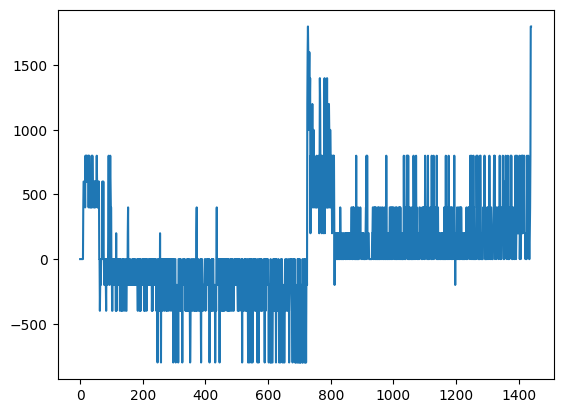

In [223]:
all_pats = patterns.sum(axis=1)
print(all_pats)
all_pats.plot()

## X paramiter for feeding Model

In [224]:
X = df.drop(['Sum'], axis=1)
X

,BuyQuoteVolume,CDL2CROWS,CDL3BLACKCROWS,CDL3INSIDE,CDL3LINESTRIKE,CDL3OUTSIDE,CDL3STARSINSOUTH,CDL3WHITESOLDIERS,CDLABANDONEDBABY,CDLADVANCEBLOCK,CDLBELTHOLD,CDLBREAKAWAY,CDLCLOSINGMARUBOZU,CDLCONCEALBABYSWALL,CDLCOUNTERATTACK,CDLDARKCLOUDCOVER,CDLDOJI,CDLDOJISTAR,CDLDRAGONFLYDOJI,CDLENGULFING,CDLEVENINGDOJISTAR,CDLEVENINGSTAR,CDLGAPSIDESIDEWHITE,CDLGRAVESTONEDOJI,CDLHAMMER,CDLHANGINGMAN,CDLHARAMI,CDLHARAMICROSS,CDLHIGHWAVE,CDLHIKKAKE,CDLHIKKAKEMOD,CDLHOMINGPIGEON,CDLIDENTICAL3CROWS,CDLINNECK,CDLINVERTEDHAMMER,CDLKICKING,CDLKICKINGBYLENGTH,CDLLADDERBOTTOM,CDLLONGLEGGEDDOJI,CDLLONGLINE,CDLMARUBOZU,CDLMATCHINGLOW,CDLMATHOLD,CDLMORNINGDOJISTAR,CDLMORNINGSTAR,CDLONNECK,CDLPIERCING,CDLRICKSHAWMAN,CDLRISEFALL3METHODS,CDLSEPARATINGLINES,CDLSHOOTINGSTAR,CDLSHORTLINE,CDLSPINNINGTOP,CDLSTALLEDPATTERN,CDLSTICKSANDWICH,CDLTAKURI,CDLTASUKIGAP,CDLTHRUSTING,CDLTRISTAR,CDLUNIQUE3RIVER,CDLUPSIDEGAP2CROWS,CDLXSIDEGAP3METHODS,Change,Close,High,Low,Open,Trades,VolumeBTC,VolumeBUSD,rsi,rsisignal
0,19.68150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000119,16765.73,16770.81,16764.48,16765.75,1880.0,40.99442,6.873578e+05,0.000000,0.0
1,7.32206,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000119,16754.11,16755.60,16753.41,16754.13,420.0,12.70363,2.128430e+05,0.000000,0.0
2,40.39891,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000178,16820.67,16825.45,16813.12,16820.70,2180.0,86.91679,1.461859e+06,0.000000,0.0
3,32.39458,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000238,16781.01,16784.23,16779.70,16781.05,1768.0,58.39194,9.799370e+05,0.000000,0.0
4,55.70302,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000299,16746.40,16747.51,16741.80,16746.45,2613.0,107.27098,1.796215e+06,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,1082.16825,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.392702,16767.82,16861.42,16700.80,16702.23,23046.0,2038.68257,3.423084e+07,53.864444,0.0
1436,369.70206,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.393750,16702.97,16710.00,16637.46,16637.46,9072.0,734.60299,1.225125e+07,52.319880,0.0
1437,23.29745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,-100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-100.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,-100.0,100.0,100.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000060,16754.24

## Y paramiter for feedind Model

In [225]:
y = df['Sum']
y

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
        ...  
1435    100.0
1436    200.0
1437    400.0
1438    900.0
1439    900.0
Name: Sum, Length: 1440, dtype: float64

## Model for AI Research

In [226]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

model = DecisionTreeClassifier()
# model=RandomForestClassifier()
model

DecisionTreeClassifier()

## Fit X and y data to model

In [227]:
# model.fit(X, y)

## Calculating the Accuracy
### Normally I take very small data for that but in real application we have to take very big dataset

In [228]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.1)

model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(predictions)
print(len(predictions))
accuracy_score(y_test, predictions)

[   0.  200.    0.  200.  400.  200.    0.  200.    0.  100.  400.    0.
    0.  400. -100.  100. -200.    0. -100.    0. -100.  200. -400.    0.
    0. -100.    0. -100.    0.    0.  100.    0. -100.  100.    0.  400.
  100.  300.  400. -200. -200. -100.  400.    0.    0.    0.    0.  200.
  200. -100.  100. -100.  100. -400.    0.    0. -400. -400.  400.  100.
 -100. -400. -100.  100. -100.  100.    0.    0.    0.    0.  100.  100.
  100.  200.    0.  400. -100.    0.    0.    0.    0.  400.    0.  400.
 -100. -100.    0.    0. -100.  400.  100. -100.  100. -200.    0.    0.
 -200.  200.  100. -100. -400.  400. -200.    0.    0.  100.  400. -200.
    0.    0.    0.  100.    0.    0.  100.    0.  100.    0.    0.  200.
  200.    0.  100. -100.  100.    0.    0.  200.  300. -100. -200. -400.
 -100.  200.    0.  100. -100. -200. -100.    0.    0. -100.    0.    0.]
144


0.9444444444444444

## Export Train model

In [ ]:
import joblib
model = model.fit(X_train, y_train)
joblib.dump(model, "btcbusd_trand_predictor.joblib")

## Directally Grab Fidable data from internet but it have to be superviged test data from database

## Make Prediction With Train Model

In [ ]:
from dataframe import GetDataframe
symbol = "BTCBUSD"

df = GetDataframe().get_minute_data(symbol, 1, 5)
df = df.iloc[:,0:10]
df.astype(float)
# df = df.drop(columns=['symbol','VolumeBUSD', 'CloseTime'])
# df = df.iloc[0]
# print(df)
results = []
cols = []
for attr in dir(talib):
    if attr[:3]=='CDL':
#         print(getattr(talib, attr))
        res = getattr(talib, attr)(df['Open'], df['High'], df['Low'],
                                         df['Close'])
        results.append(res)
        cols.append(attr)
# print(results)
# print(cols)

patterns = pd.DataFrame(results).T
patterns.columns = cols
patterns.astype(float)
patterns["Sum"] = patterns.sum(axis=1)
patterns
df = df.add(patterns, fill_value=0)
df = df.drop(['CloseTime', 'Sum'], axis=1)
df = df.iloc[-2]
# print(df)
print(model.predict([df]))

In [ ]:
# print(df)

model = joblib.load("btcbusd_trand_predictor.joblib")
predictions = model.predict([df])
predictions

## All Coulms need for creat a Visual Representation

In [ ]:
feature_name = list(X.columns)

## Export model in dot visual language
class_names=sorted(y.unique()),

In [ ]:
from sklearn import tree
model = DecisionTreeClassifier()
model.fit(X, y)
tree.export_graphviz(model, out_file='btc_busd_visual.dot',
                    feature_names=feature_name,
                     label='all',
                     rounded=True,
                     filled=True
                    )

## Use Tensorflow

In [ ]:
import tensorflow as tf
model = tf.keras.models.Sequential()

In [ ]:
model.add(tf.keras.layers.Dense(256, input_shape=X_train.shape, activation='sigmoid'))
model.add(tf.keras.layers.Dense(256, activation='sigmoid'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# model.fit(X_train, y_train, epochs=1000)